### AI Assignments No. 4

<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Question 1) KNN Classifier with PCA</b><br>
In the Persian digit classification code, find the optimal K in the KNN algorithm. For this exercise, searching in the range of 1 to 10 is sufficient. Please also plot a graph where the x-axis represents the value of K and the y-axis represents the accuracy on the X_test data, and analyze it.
</div>

In [17]:
import cv2
import numpy as np
from scipy import io
# from load_hoda import load_hoda

def load_hoda(training_sample_size=1000, test_sample_size=200, size=5):
    #load dataset
    trs = training_sample_size
    tes = test_sample_size
    dataset = io.loadmat('Data_hoda_full.mat')

    #test and training set
    X_train_orginal = np.squeeze(dataset['Data'][:trs])
    y_train = np.squeeze(dataset['labels'][:trs])
    X_test_original = np.squeeze(dataset['Data'][trs:trs+tes])
    y_test = np.squeeze(dataset['labels'][trs:trs+tes])

    #resize
    X_train_5by5 = [cv2.resize(img, dsize=(size, size)) for img in X_train_orginal]
    X_test_5by_5 = [cv2.resize(img, dsize=(size, size)) for img in X_test_original]
    #reshape
    X_train = np.reshape(X_train_5by5, [-1,size**2])
    X_test = np.reshape(X_test_5by_5, [-1,size**2])

    return X_train, y_train, X_test, y_test

In [18]:
X_train, y_train, X_test, y_test = load_hoda(size = 25)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

knn = KNeighborsClassifier(n_neighbors=3)

start_time = time.time()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
end_time = time.time()

accuracy_without_pca = accuracy_score(y_test, y_pred)
time_without_pca = end_time - start_time

print(f"accuracy without PCA: {accuracy_without_pca:.4f}")
print(f"time without PCA: {time_without_pca:.4f} seconds")

accuracy without PCA: 0.9550
time without PCA: 0.0434 seconds


In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=3)

start_time_pca = time.time()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
end_time_pca = time.time()

accuracy_with_pca = accuracy_score(y_test, y_pred_pca)
time_with_pca = end_time_pca - start_time_pca

print(f"accuracy with PCA: {accuracy_with_pca:.4f}")
print(f"time with PCA: {time_with_pca:.4f} seconds")

accuracy with PCA: 0.9200
time with PCA: 0.0472 seconds


was expected to consume less time btw ...

___

<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Question 2) Stack Overflow Text Classification</b><br>
Perform text classification on the Stack Overflow dataset. Dataset URL:
https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz
</div>

In [1]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz

--2024-10-04 18:09:49--  https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 142.250.107.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6053168 (5.8M) [application/x-gzip]
Saving to: ‘stack_overflow_16k.tar.gz’

stack_overflow_16k. 100%[===================>]   5.77M  --.-KB/s    in 0.1s    

2024-10-04 18:09:49 (52.2 MB/s) - ‘stack_overflow_16k.tar.gz’ saved [6053168/6053168]



In [2]:
import tarfile
import os
import pandas as pd

with tarfile.open("stack_overflow_16k.tar.gz", "r:gz") as tar:
    tar.extractall(path="stack_overflow_data")

In [3]:
import os
import pandas as pd

base_dir = 'stack_overflow_data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# loading our data
def load_data(directory):
    texts = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for file_name in os.listdir(label_dir):
            file_path = os.path.join(label_dir, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(label)
    return texts, labels

X_train , y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# converting text to numerical features
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

#### using svc

In [5]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train_counts, y_train)

SVC(kernel='linear')

In [6]:
from sklearn.metrics import accuracy_score

y_test_pred = model.predict(X_test_counts)

accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy of svm model on test data: {accuracy:.2f}')

Accuracy of svm model on test data: 0.80


In [8]:
for text, pred, label in zip(X_test[:10], y_test_pred[:10], y_test):
    print(f'Text: {text[:30]}... | Predicted Label: {pred}, | Real label: {label}')

Text: "disable exe from task manager... | Predicted Label: csharp, | Real label: csharp
Text: "what is the correct way of st... | Predicted Label: csharp, | Real label: csharp
Text: what is alternative to timer c... | Predicted Label: csharp, | Real label: csharp
Text: "replacing a certain word in a... | Predicted Label: csharp, | Real label: csharp
Text: "trouble with guessing the num... | Predicted Label: csharp, | Real label: csharp
Text: "split bitmap into pieces and ... | Predicted Label: csharp, | Real label: csharp
Text: "if (count == 1) close this fo... | Predicted Label: csharp, | Real label: csharp
Text: "does this code create a tempo... | Predicted Label: csharp, | Real label: csharp
Text: "how to ignore the case sensit... | Predicted Label: csharp, | Real label: csharp
Text: "how to delete duplicate value... | Predicted Label: csharp, | Real label: csharp


#### using naive bayes classifier

In [9]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_counts, y_train)

MultinomialNB()

In [10]:
from sklearn.metrics import accuracy_score

y_test_pred = model.predict(X_test_counts)

accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy of NB model on test data: {accuracy:.2f}')

Accuracy of NB model on test data: 0.84


___

<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Question 3) Text Clustering</b><br>
From three classes of your choice in Exercise 2, take 10 samples from each class and perform clustering. Does your clustering place problems from the same topic in the same cluster?
</div>

In [11]:
import os
import random

base_dir = 'stack_overflow_data'
train_dir = os.path.join(base_dir, 'train')

# choosing languages
chosen_languages = ['csharp', 'java', 'python']
samples_per_class = 10

texts = []
labels = []

for lang in chosen_languages:
    lang_dir = os.path.join(train_dir, lang)
    files = os.listdir(lang_dir)
    selected_files = random.sample(files, samples_per_class) # random selection of 10 files
    for file_name in selected_files:
        file_path = os.path.join(lang_dir, file_name)
        with open(file_path, 'r', encoding='utf-8') as f:
            texts.append(f.read())
            labels.append(lang)

print(f'Number of samples: {len(texts)}')

Number of samples: 30


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# converting text to numerical features using tf-idf
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

In [13]:
from sklearn.cluster import KMeans

num_clusters = len(chosen_languages)

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

clusters = kmeans.labels_

In [14]:
import pandas as pd

results = pd.DataFrame({'Text': texts, 'True Label': labels, 'Cluster': clusters})

for i in range(num_clusters):
    print(f'\nCluster {i}:')
    cluster_samples = results[results['Cluster'] == i]
    for index, row in cluster_samples.iterrows():
        print(f'True Label: {row["True Label"]} | Text: {row["Text"][:20]}...')



Cluster 0:
True Label: csharp | Text: "wpf statusbar updat...
True Label: csharp | Text: "is there any practi...
True Label: csharp | Text: "class generation fr...
True Label: csharp | Text: "can´t handle pictur...
True Label: csharp | Text: "why use ilist or li...
True Label: csharp | Text: "string takes any va...
True Label: java | Text: "method that adds el...
True Label: java | Text: "passing function as...
True Label: java | Text: "more than one retur...
True Label: java | Text: "how come blank is i...
True Label: java | Text: "blank.lang.illegals...
True Label: python | Text: "get the return valu...

Cluster 1:
True Label: csharp | Text: "blank - 'the given ...
True Label: java | Text: "converting a date f...
True Label: python | Text: "appending extra dat...

Cluster 2:
True Label: csharp | Text: "how best to share a...
True Label: csharp | Text: "userprincipal exten...
True Label: csharp | Text: "find greatest value...
True Label: java | Text: "check if a path is ...
True Labe

It is observed that clustering does not place texts from the same class in the same cluster very well.

___

<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Question 4) Visualizing Text Dataset Samples</b><br>
From three classes of your choice in Exercise 2, take 10 samples from each class. Apply PCA with two components and color each class differently. Is the separability high?
</div>

We consider the steps of the previous exercise up to vectorization.

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

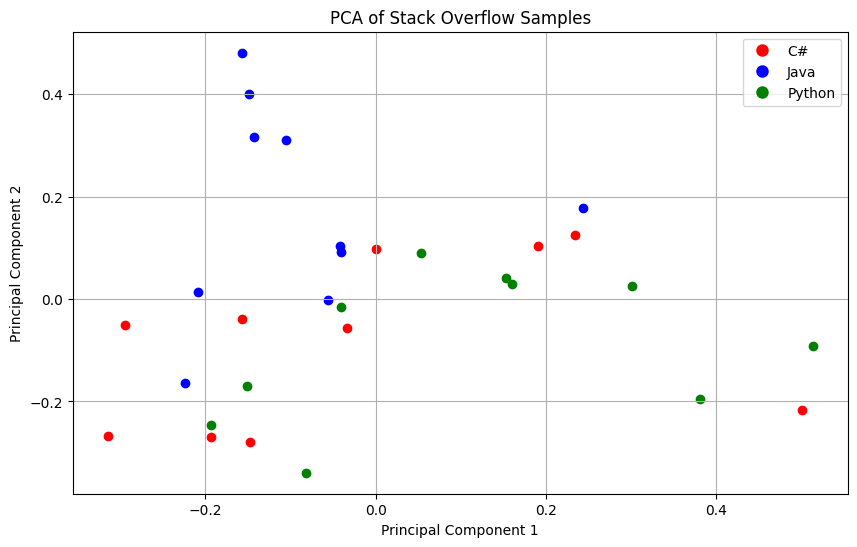

In [16]:
import matplotlib.pyplot as plt

colors = {'csharp': 'red', 'java': 'blue', 'python': 'green'}

plt.figure(figsize=(10, 6))
for i in range(len(X_pca)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], color=colors[labels[i]], label=labels[i])

plt.title('PCA of Stack Overflow Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='C#', markerfacecolor='red', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Java', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Python', markerfacecolor='green', markersize=10)])
plt.grid()
plt.show()


It is observed that the classes overlap significantly and are not well separated from each other. Therefore, it is natural that the separability is not high and clustering does not work well.